In [ ]:
import tensorflow as tf #library utama yaitu tensorflow untuk deep learning
from tensorflow.keras import layers #panggil fungsi layer untuk membuat layer neural network
import pandas as pd
import matplotlib.pyplot as plt #Untuk plotting dan baca gambar
from sklearn.model_selection import train_test_split #Fungsi pemisah dataset menjadi data training dan testing
import numpy as np #Library untuk manipulasi array

In [ ]:
#Cek apakah ada CPU dan GPU
print('CPU: {}'.format(len(tf.config.list_physical_devices('CPU'))))
print('GPU: {}'.format(len(tf.config.list_physical_devices('GPU'))))

CPU: 1
GPU: 1


In [ ]:
#Load dataset
data_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Skripsi/train.csv')
data_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Skripsi/test.csv')

In [ ]:
data_train

,emotions,pixels,Usage
0,0,50 32 15 11 12 10 10 8 15 10 7 7 6 5 5 6 8 4 6...,Training
1,0,29 24 29 11 15 22 26 11 7 17 29 23 25 37 47 50...,Training
2,0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,Training
3,0,155 138 98 112 94 97 111 107 101 84 83 90 86 1...,Training
4,0,211 215 220 221 219 216 213 210 207 205 202 20...,Training
...,...,...,...
5903,6,65 85 96 84 21 23 30 31 35 29 28 27 38 88 117 ...,Training
5904,6,176 97 77 86 84 82 94 116 128 128 127 128 133 ...,Training
5905,6,4 5 4 4 6 5 4 6 5 3 15 25 41 47 53 62 70 74 76...,Training
5906,6,90 131 156 188 162 85 98 124 149 181 197 201 2...,Training


In [ ]:
data_test


,emotions,pixels,Usage
0,0,46 34 26 23 12 32 35 26 26 38 71 99 123 134 14...,PrivateTest
1,0,55 33 54 32 26 21 50 29 38 45 79 73 43 22 51 5...,PrivateTest
2,0,123 123 126 131 124 69 109 149 159 174 169 178...,PrivateTest
3,0,255 255 255 255 255 255 255 255 255 251 254 16...,PrivateTest
4,0,127 121 124 137 123 118 120 111 111 109 118 14...,PrivateTest
...,...,...,...
1472,6,233 228 228 224 225 225 230 226 228 214 153 14...,PrivateTest
1473,6,90 85 109 148 134 150 140 131 149 148 145 159 ...,PrivateTest
1474,6,215 155 143 221 235 219 212 209 204 201 197 19...,PrivateTest
1475,6,142 109 44 48 44 40 34 42 34 26 26 28 32 33 36...,PrivateTest


In [ ]:
data_train['label']=data_train['emotions'] #Assign value pada kolom emotion ke kolom baru dengan nama 'label'
emotions={0:'Marah',1:'Jijik',2:'Takut',3:'Bahagia',4:'Sedih',5:'Terkejut',6:'Netral'} #Buat dictionary label value dan kategori
data_train['emotions']=data_train['emotions'].replace(emotions) #Mengganti label angka menjadi kategori

In [ ]:
data_test['label']=data_test['emotions'] #Assign value pada kolom emotion ke kolom baru dengan nama 'label'
emotions={0:'Marah',1:'Jijik',2:'Takut',3:'Bahagia',4:'Sedih',5:'Terkejut',6:'Netral'} #Buat dictionary label value dan kategori
data_test['emotions']=data_test['emotions'].replace(emotions) #Mengganti label angka menjadi kategori

In [ ]:
X = data_train['pixels'].apply(lambda x: np.array(x.split()).reshape(48, 48, 1).astype('float32')) #Ubah ukuran gambar ke 48x48x1
X = np.stack(X, axis=0) #Stack gambar
X.shape #Melihat ukuran tensor dataset gambar

(5908, 48, 48, 1)

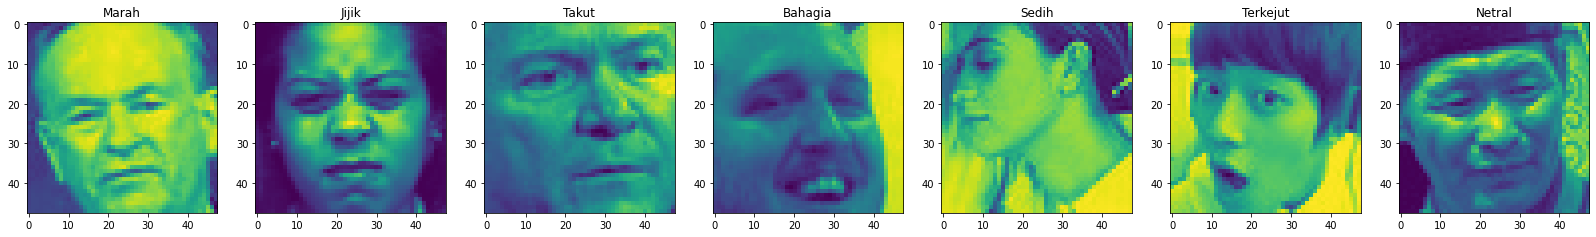

In [ ]:
#Menampilkan Gambar
fig,ax=plt.subplots(ncols=7,figsize=(28,4))
for i in range(7):
    ax[i].imshow(tf.squeeze(X[np.where(data_train['label'].values==i)][6]))
    ax[i].set_title(emotions[i])

In [ ]:
Y = data_test['pixels'].apply(lambda x: np.array(x.split()).reshape(48, 48, 1).astype('float32')) #Ubah ukuran gambar ke 48x48x1
Y = np.stack(Y, axis=0) #Stack gambar
Y.shape #Melihat ukuran tensor dataset gambar

(1477, 48, 48, 1)

AxesSubplot(0.125,0.125;0.775x0.755)


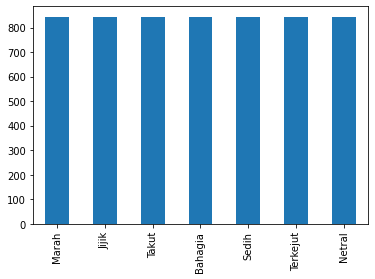

In [ ]:
print(data_train.emotions.value_counts().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


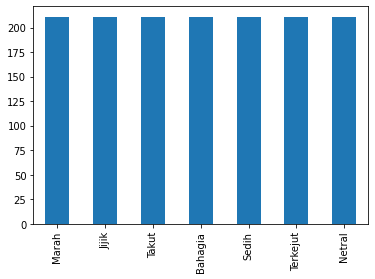

In [ ]:
print(data_test.emotions.value_counts().plot(kind='bar'))

In [ ]:
X_3c=tf.image.grayscale_to_rgb(tf.constant(X)).numpy().astype(np.int32) #Convert gambar ke 3 channel
X_3c.shape


(5908, 48, 48, 3)

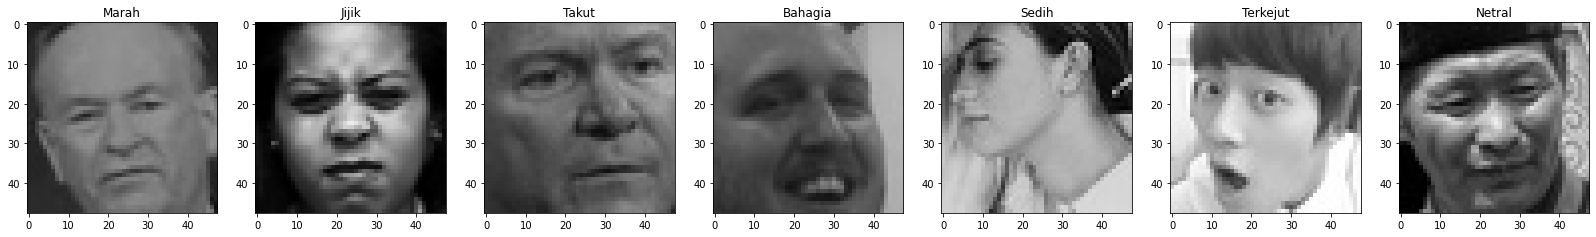

In [ ]:
#Menampilkan Gambar
fig,ax=plt.subplots(ncols=7,figsize=(28,4))

for i in range(7):
    ax[i].imshow(X_3c[np.where(data_train['label'].values==i)][6])
    ax[i].set_title(emotions[i])




In [ ]:
x1=X_3c[np.where(data_train['label'].values==0)][6]
x2=X_3c[np.where(data_train['label'].values==1)][6]
x3=X_3c[np.where(data_train['label'].values==2)][6]
x4=X_3c[np.where(data_train['label'].values==3)][6]
x5=X_3c[np.where(data_train['label'].values==4)][6]
x6=X_3c[np.where(data_train['label'].values==5)][6]
x7=X_3c[np.where(data_train['label'].values==6)][6]

x_aug = np.array([x1,x2,x3,x4,x5,x6,x7])
x_aug.shape


(7, 48, 48, 3)

In [ ]:
Y_3c=tf.image.grayscale_to_rgb(tf.constant(Y)).numpy().astype(np.int32) #Convert gambar ke 3 channel
Y_3c.shape

(1477, 48, 48, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Melakukan augmentasi gambar, dirotasi, zoom, shear, flip, dan digeser
dataAugmentaion = ImageDataGenerator(rotation_range = 30, zoom_range = 0.20, 
fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, 
width_shift_range = 0.1, height_shift_range = 0.1)

In [ ]:
#Melakukan one hot encoding terhadap label target, dimana masing-masing label dijadikan kolom dan masing-masing kolom
#nilainya 1 atau 0
a=pd.get_dummies(data_train['label'])
b=pd.get_dummies(data_test['label'])


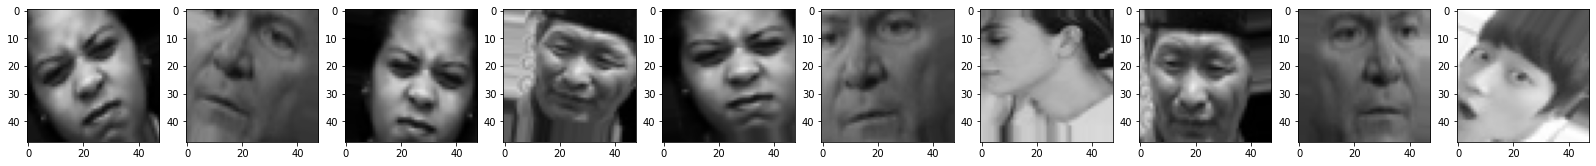

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

dataAugmentaion = ImageDataGenerator(    
rescale=1./255,rotation_range = 30, zoom_range = 0.20, 
fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, 
width_shift_range = 0.1, height_shift_range = 0.1,)

dir_It  = dataAugmentaion.flow(x_aug, batch_size = 7)


fig,ax=plt.subplots(ncols=10,figsize=(28,4))

for i in range(10):
    img = dir_It.next()
    ax[i].imshow(img[0])


IndexError: ignored

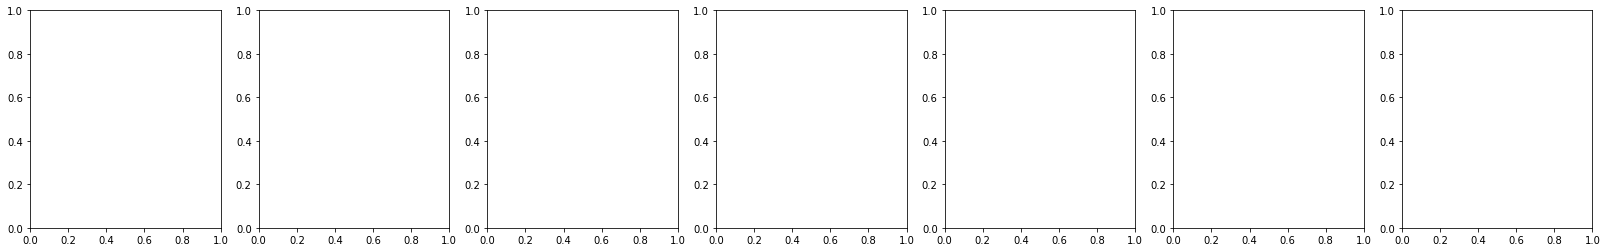

In [ ]:
fig,ax=plt.subplots(ncols=7,figsize=(28,4))
for i in range(7):
    img = dir_It.next()
    ax[i].imshow(img[np.where(data_train['label'].values==i)][1])
    ax[i].set_title(emotions[i])

In [ ]:
print(a)

      0  1  2  3  4  5  6
0     1  0  0  0  0  0  0
1     1  0  0  0  0  0  0
2     1  0  0  0  0  0  0
3     1  0  0  0  0  0  0
4     1  0  0  0  0  0  0
...  .. .. .. .. .. .. ..
5903  0  0  0  0  0  0  1
5904  0  0  0  0  0  0  1
5905  0  0  0  0  0  0  1
5906  0  0  0  0  0  0  1
5907  0  0  0  0  0  0  1

[5908 rows x 7 columns]


In [ ]:
print(X_3c.shape) #Ukuran training feature
print(Y_3c.shape) #Ukuran test feature
print(a.shape) #Ukuran training label
print(b.shape) #Ukuran test label

(5908, 48, 48, 3)
(1477, 48, 48, 3)
(5908, 7)
(1477, 7)


In [ ]:
#Definisikan model VGG16 dengan input shape 48x48x3, include_top=False diset supaya baris pertama disertakan dalam training, weight diset imagenet
#karena model pre-trained VGG16 ditrain dengan data dari imagenet
base_model=tf.keras.applications.VGG16(input_shape=(48,48,3),include_top=False,weights='imagenet')

model=tf.keras.Sequential() #Set model deep learning sequential
model.add(base_model) #Menambahkan model VGG16 ke arsitektur model
model.add(layers.Flatten()) #Menambahkan layer flatten untuk mengubah ukuran gambar menjadi flat/2D array
model.add(layers.Dense(2048,activation='relu')) #Menambahkan layer Dense dengan shape 2048 dan activation relu
model.add(layers.Dense(1024,activation='relu')) #Menambahkan layer Dense dengan shape 1024 dan activation relu
model.add(layers.Dense(512,activation='relu')) #Menambahkan layer Dense dengan shape 512 dan activation relu
model.add(layers.Dense(256,activation='relu')) #Menambahkan layer Dense dengan shape 256 dan activation relu
model.add(layers.Dense(128,activation='relu')) #Menambahkan layer Dense dengan shape 128 dan activation relu
model.add(layers.Dense(64,activation='relu')) #Menambahkan layer Dense dengan shape 64 dan activation relu
model.add(layers.Dense(7,activation='softmax')) #Menambahkan output layer Dense dengan shape 7 dan activation softmax

model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 2048)              1050624   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                         

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

#Callback checkpoint untuk save model setiap menemukan metrik yang terbaik, disini diset validation loss
checkpoint = ModelCheckpoint('EkspresiWajahVGG16-Check24.h5',
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)

#Callback untuk menghentikan training jika val_lossnya paling rendah dengan menunggu 50 epoch selanjutnya baru berhenti jika tidak ada improvisasi
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=50, 
                          verbose=1,
                          restore_best_weights=True
                          )

#Mengurangi nilai learning rate ketika model tidak mengalami improvisasi selama 12 epoch berturut-turut
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=12,
                              verbose=1,
                              min_delta=0.001)

#Mengkompail arsitektur model, loss function, optimizer, dan metrik untuk selanjutnya ditraining
model.compile(loss='binary_crossentropy',optimizer=tf.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])


#fitting model dengan data training yang dilakukan augmentasi dan disertakan juga data validasi, step per epoch diset
#sejumlah banyaknya data training/batch size, epoch diset maksimal 50 epoch dan disertakan juga callbacks yang sudah diset di atas
hist=model.fit_generator(dataAugmentaion.flow(X_3c, a, batch_size = 32),
 validation_data = (Y_3c, b), steps_per_epoch = len(X_3c) // 32,
 epochs = 50, callbacks=[checkpoint,earlystop,reduce_lr])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


184/184 [==============================] - ETA: 0s - loss: 0.4239 - accuracy: 0.1732
Epoch 1: val_accuracy improved from -inf to 0.23155, saving model to EkspresiWajahVGG16-Check24.h5
184/184 [==============================] - 25s 59ms/step - loss: 0.4239 - accuracy: 0.1732 - val_loss: 0.3993 - val_accuracy: 0.2316 - lr: 1.0000e-04
Epoch 2/50
183/184 [============================>.] - ETA: 0s - loss: 0.3859 - accuracy: 0.2918
Epoch 2: val_accuracy improved from 0.23155 to 0.36222, saving model to EkspresiWajahVGG16-Check24.h5
184/184 [==============================] - 9s 47ms/step - loss: 0.3858 - accuracy: 0.2920 - val_loss: 0.3652 - val_accuracy: 0.3622 - lr: 1.0000e-04
Epoch 3/50
183/184 [============================>.] - ETA: 0s - loss: 0.3559 - accuracy: 0.3754
Epoch 3: val_accuracy improved from 0.36222 to 0.42519, saving model to EkspresiWajahVGG16-Check24.h5
184/184 [==============================] - 9s 48ms/step - loss: 0.3559 - accuracy: 0.3751 - val_loss: 0.3309 - val_accura

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Model/EkspresiWajahVGG16-Train24.h5') #trainining 24

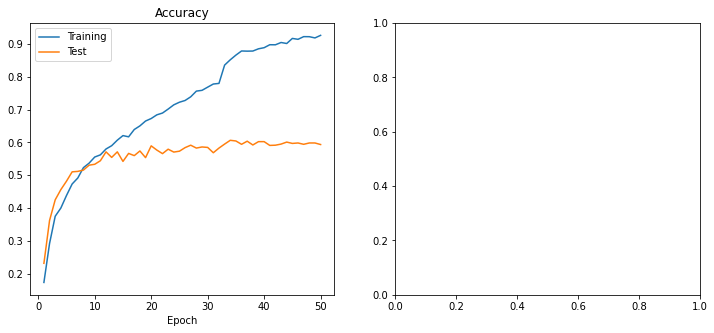

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(12,5)) #menampilkan grafik pelatihan
epochs=len(hist.history['accuracy'])
ax[0].plot(range(1,epochs+1),hist.history['accuracy'],label='Training')
ax[0].plot(range(1,epochs+1),hist.history['val_accuracy'],label='Test')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()


              precision    recall  f1-score   support

           0       0.92      0.87      0.89       211
           1       0.99      1.00      0.99       211
           2       0.84      0.82      0.83       211
           3       0.98      0.97      0.97       211
           4       0.84      0.80      0.82       211
           5       0.96      0.86      0.91       211
           6       0.91      0.94      0.92       211

   micro avg       0.92      0.89      0.91      1477
   macro avg       0.92      0.89      0.90      1477
weighted avg       0.92      0.89      0.90      1477
 samples avg       0.89      0.89      0.89      1477

Accuracy :  0.8937034529451591


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


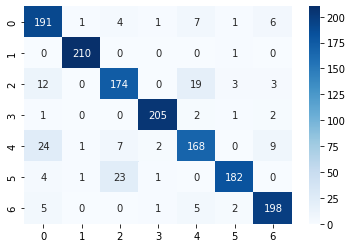

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model

model=load_model('/content/drive/MyDrive/EkspresiWajahVGG16-Check24.h5')

#menampilkan nilai confusion matrix
X_train,X_test,y_train,y_test=train_test_split(X_3c,a,stratify=a,random_state=50)
y_pred=np.round(model.predict(X_test))

print(classification_report(y_test,y_pred))
print('Accuracy : ',accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), normalize=None)
sns.heatmap(cm,annot=True, fmt="d", cmap='Blues')

